# Objectives

**Ultimate Goal**
- Explore Data thoroughly, getting some insight that is not visible in plain sight
- Reasonably Visualize the Data with beautiful, meaningful Plot(s)
- Do Classification, with the understand from ground up(if could implement it myself would be really great)

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Import Data as DataFrame

In [4]:
import pandas as pd
iris_df = pd.read_csv("datasets/iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Basic Information about Dataset

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_df['Species'].unique().size # total uniqe item of categorical values

3

In [8]:
cat_cols = []
num_cols = []

for col in iris_df.columns:
    if iris_df[col].unique().size > 10: # assumeing that 10 is the maximum unique item for categorical columns
        num_cols.append(col)
        continue
    cat_cols.append(col)

print("num_cols : ",num_cols)
print("cat_cols : ",cat_cols)

num_cols :  ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
cat_cols :  ['Species']


## Checking for Outliers in Numerical Columns

In [9]:
outliers_threshold = 2
for col in num_cols:
    outliers = (stats.zscore(iris_df[col]) > outliers_threshold)
    print(f"{col} has {'no' if not outliers.any() else outliers.sum()} outliers")

Id has no outliers
SepalLengthCm has 6 outliers
SepalWidthCm has 4 outliers
PetalLengthCm has no outliers
PetalWidthCm has no outliers


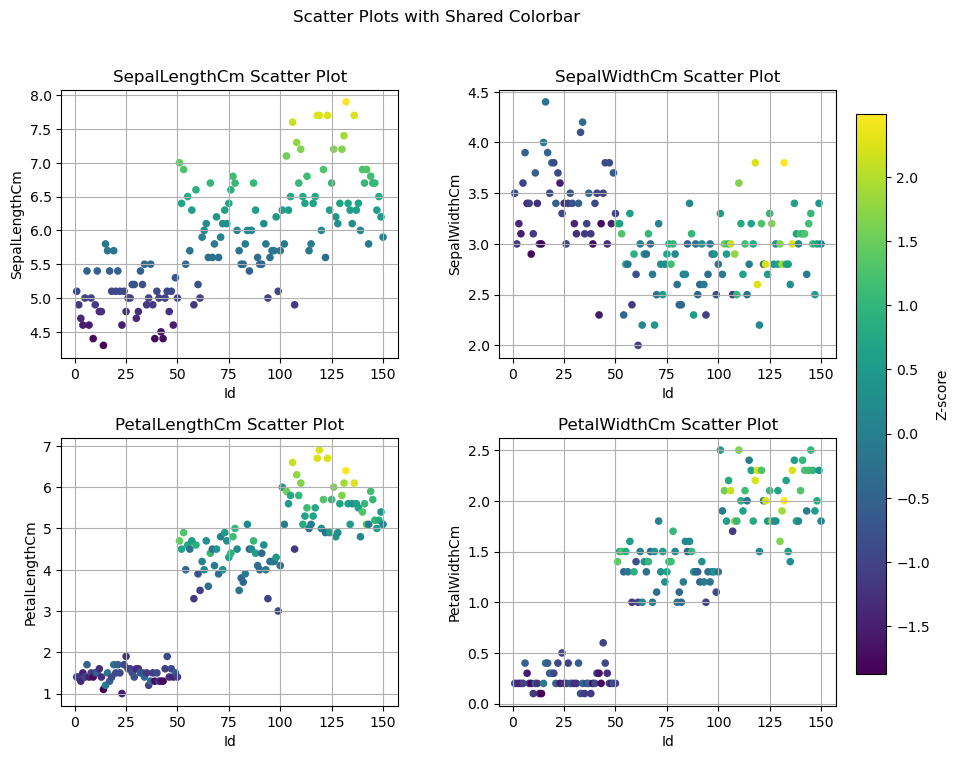

In [35]:
import matplotlib.cm as cm  # Import colormap module

# ... (Your existing code to load/create iris_df and define target_col) ...

columns = iris_df.columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Choose a colormap
cmap = cm.viridis  # Or any colormap you prefer

# Store the scatter plot objects to use for the colorbar
scatter_plots = []

for idx, col in enumerate(columns[1:-1]):
    row = idx // 2
    col_num = idx % 2  # Corrected column index

    temp_iris_df = iris_df.copy()
    temp_iris_df[f"{col}_zscore"] = stats.zscore(temp_iris_df[target_col])

    # Use plt.scatter directly, store the return value
    scatter = axes[row, col_num].scatter(temp_iris_df["Id"], temp_iris_df[col], c=temp_iris_df[f"{col}_zscore"], cmap=cmap, s=20)  # s=20 for marker size
    scatter_plots.append(scatter) # Append the scatter plot object

    axes[row, col_num].set_title(f"{col} Scatter Plot")
    axes[row, col_num].grid(True)
    axes[row, col_num].set_xlabel("Id") # Set x-label for clarity
    axes[row, col_num].set_ylabel(col) # Set y-label

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])  # [left, bottom, width, height] - Adjust these values
cbar = fig.colorbar(scatter, cax=cbar_ax) # Use cax to specify the colorbar axes
cbar.set_label("Z-score")


plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle("Scatter Plots with Shared Colorbar") # Add a super title
plt.show()

now I think we could conclude that this datasets has so little outliers, since very few just went outside $2\sigma$ so no need to worried about it

# Setting Directions

as per the Objective

before everything, I need to understand what is the meaning of each feature

first, I need to learn on how to decide on which feature work the best for classification. With calculation

if there is non, I will try to create new feature(s) that could help me classified it clearly